In [75]:
import pandas as pd
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
import pywt

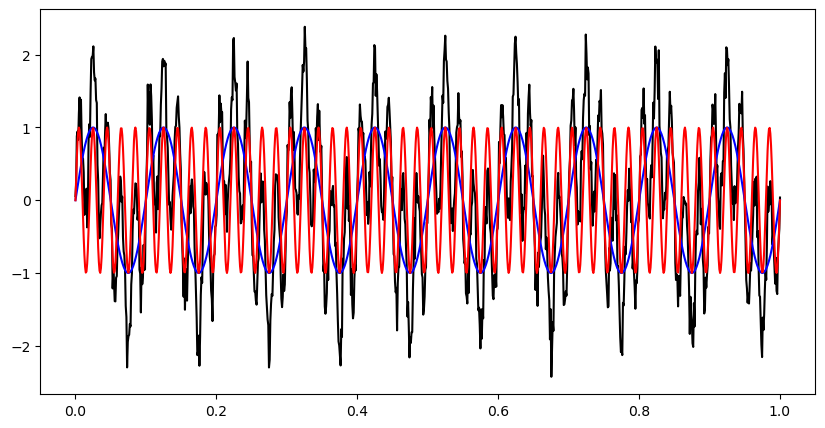

In [76]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, np.sin(2*np.pi*f1*t), 'b')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r')
plt.show()


In [77]:
wvlt = pywt.Wavelet('dmey')

In [78]:
pywt.dwt_max_level(len(F), wvlt)

4

In [79]:
cA4, cD4, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=4)

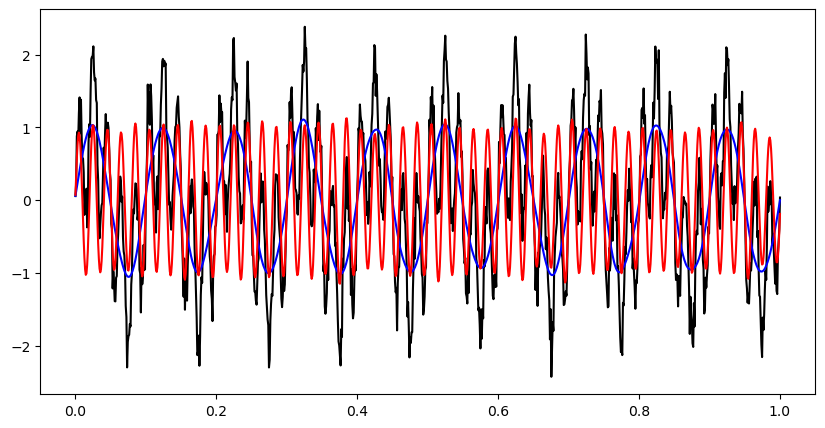

In [80]:
Fre = pywt.waverec((cA4, None, None, None, None), wvlt, mode='periodization')
Fre2 = pywt.waverec((None, cD4, None, None, None), wvlt, mode='periodization')
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre, 'b') # это будет первая периодика
plt.plot(t, Fre2, 'r') # это будет вторая периодика
plt.show()

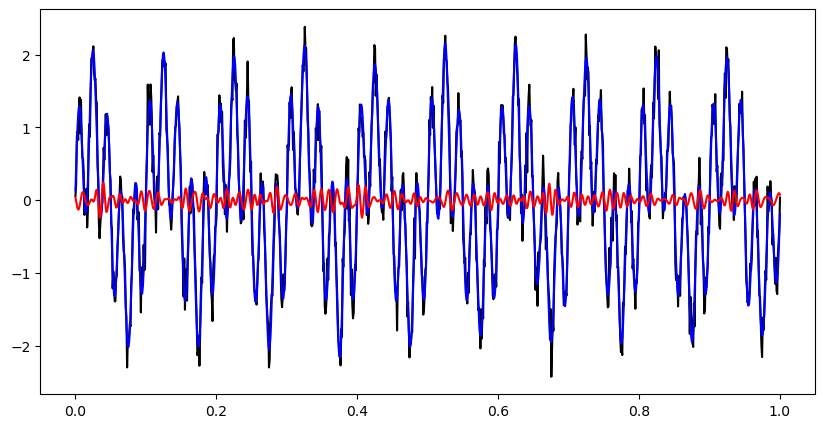

In [81]:
cA3, cD3, cD2, cD1 = pywt.wavedec(F, wvlt, mode='periodization', level=3)

Fre1 = pywt.waverec((cA3, None, None, None), wvlt, mode='periodization')
Fre21 = pywt.waverec((None, cD3, None, None), wvlt, mode='periodization')
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, Fre1, 'b') # это будет первая периодика
plt.plot(t, Fre21, 'r') # это будет вторая периодика
plt.show()

Вариант 10


In [82]:
wvlt = pywt.Wavelet('haar')
lvl = pywt.dwt_max_level(len(F), wvlt)


In [83]:
wv_dec = pywt.wavedec(F, wvlt, mode='periodic', level=lvl)

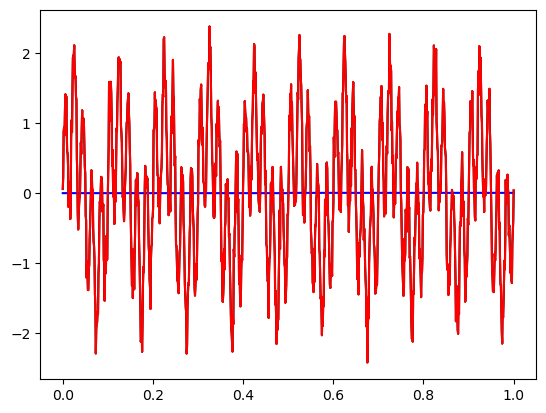

In [84]:
v10 = pywt.waverec((None, wv_dec[1], None, None, None, None, None, None, None, None, None), wvlt, mode='periodic')
v11 = pywt.waverec(wv_dec, wvlt, mode='periodic')
plt.plot(t, F, 'k')
plt.plot(t, v10, 'b') # это будет первая периодика
plt.plot(t, v11, 'r')
plt.show()

14 задание

In [85]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization')
print([node.path for node in wp.get_level(4, 'freq')]) # выводим все комбинации узлов, упорядоченные по их частотной ширине спектра

['aaaa', 'aaad', 'aadd', 'aada', 'adda', 'addd', 'adad', 'adaa', 'ddaa', 'ddad', 'dddd', 'ddda', 'dada', 'dadd', 'daad', 'daaa']


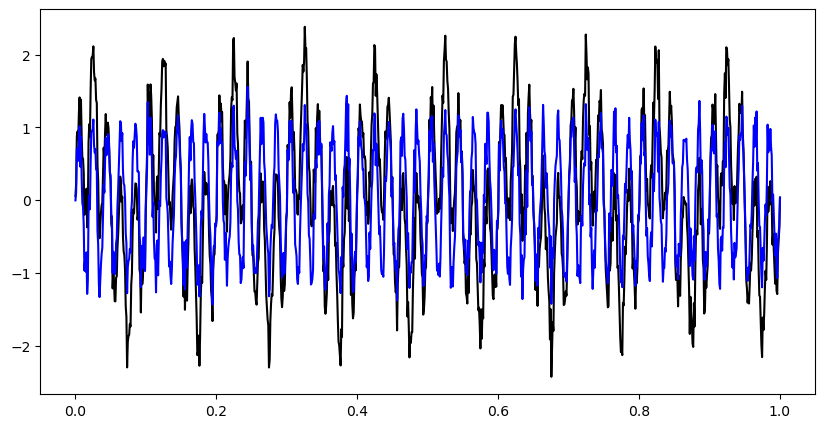

In [86]:
del wp['aaaa'] # удалим самый «глубокий» узел
reF = wp.reconstruct() # и восстановим ряд …
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF, 'b') # получим нечто периодическое, плохого качества
plt.show()

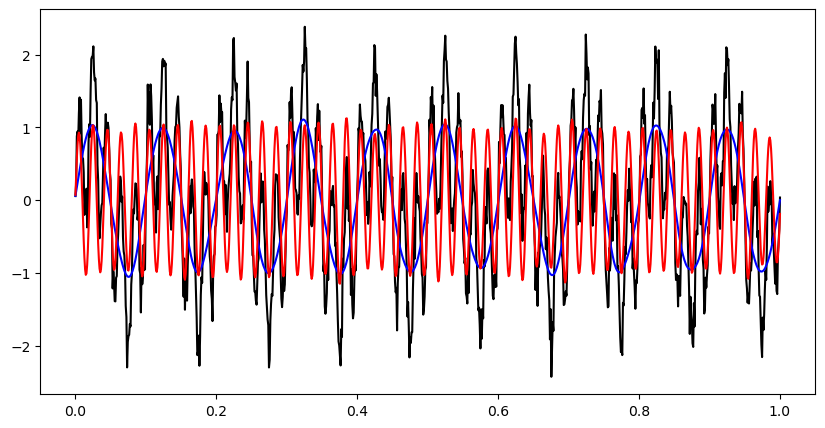

In [87]:
wp = pywt.WaveletPacket(data=F, wavelet='dmey', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1
new_wp = pywt.WaveletPacket(data=None, wavelet='dmey', mode='periodization')
new_wp['aaad'] = wp['aaad'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

17 задание

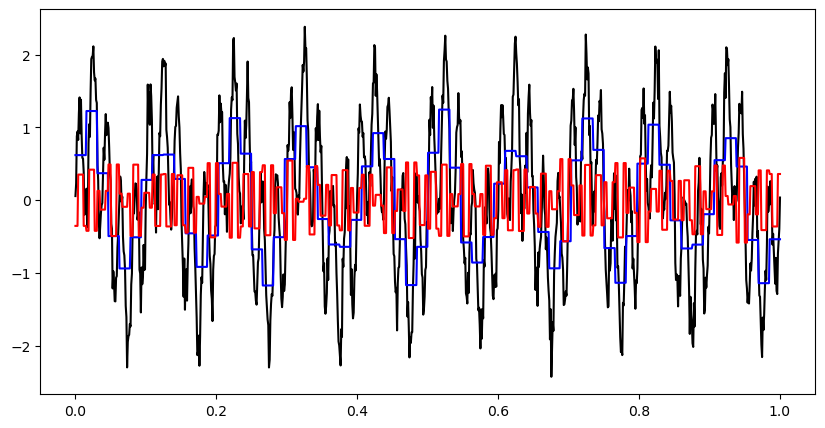

In [88]:
wp = pywt.WaveletPacket(data=F, wavelet='haar', mode='periodization')
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aaaa'] = wp['aaaa'].data # выбираем первую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF1 = new_wp.data # восстанавливаем под нее ряд 1
new_wp = pywt.WaveletPacket(data=None, wavelet='haar', mode='periodization')
new_wp['aadd'] = wp['aadd'].data # выбираем вторую ветвь
new_wp.reconstruct(update=True) # обновляем данные
reF2 = new_wp.data # восстанавливаем под нее ряд 2
plt.figure(figsize = (10, 5))
plt.plot(t, F, 'k')
plt.plot(t, reF1, 'b') # компонента 1
plt.plot(t, reF2, 'r') # компонента 2
plt.show()

18 задание

In [115]:
def Dwt(data: list, wvlt: str, Mode: str = 'periodization', num:list = [], level = None):
    wvlt = pywt.Wavelet(wvlt)
    if level is None:
        level = pywt.dwt_max_level(len(data), wvlt)
    res = pywt.wavedec(data, wvlt, mode = Mode, level = level)
    # первый элемент стартует с 1
    if len(num) == 1: # подразумевает, что берётся несколько элементов друг за другом идущих
        res[num[0]:] = [None] * (len(res) - 1)
    elif len(num) > 1: # если нужно взять не все элементы массива, а только некоторые
        arr = {}
        for i in num:
            arr[i] = res[i]
        res[:] = [None] * len(res)
        for i in arr:
            res[i] = arr[i]
    else:
        return res
            
    return pywt.waverec(res, wvlt, mode = Mode)
        



DWT haar

 1, 4, 5


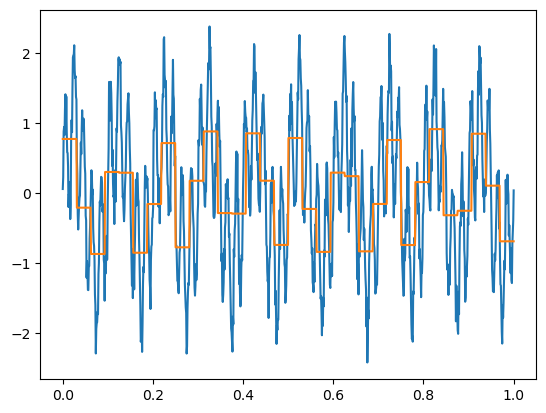

In [90]:
numer = list(map(int, input().split(',')))
res = Dwt(F, 'haar', num = numer)
plt.plot(t, F)
plt.plot(t, res)
plt.show()

DWT dmey

 1, -1


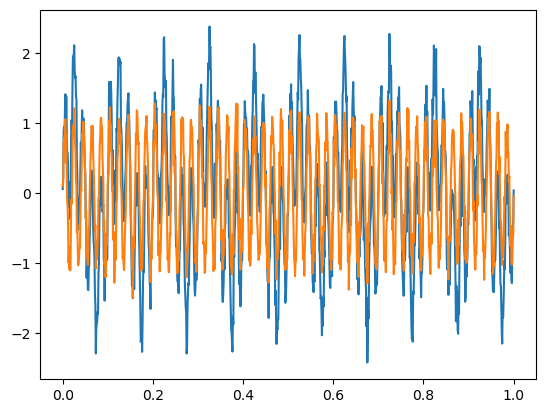

In [91]:
numer = list(map(int, input().split(',')))
res = Dwt(F, 'dmey', num = numer)
plt.plot(t, F)
plt.plot(t, res)
plt.show()

In [92]:
def Wpd(data: list, wvlt: str, Mode: str = 'periodization'):
    wvlt = pywt.Wavelet(wvlt)
    res = pywt.WaveletPacket(data = data, wavelet = wvlt, mode = Mode)
    return res

WPD haar

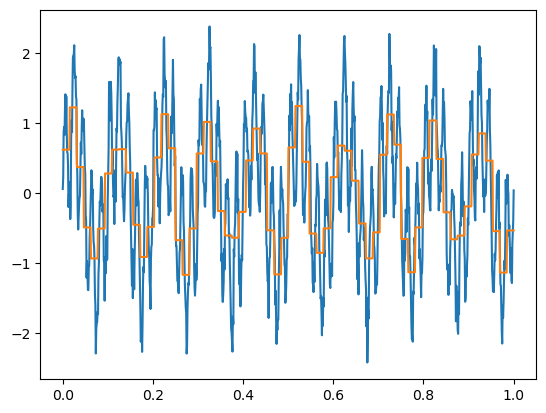

In [93]:
res = Wpd(F, 'haar')
branch_1 = Wpd(None, 'haar')
branch_1['aaaa'] = res['aaaa'].data
branch_1.reconstruct(update = True)
plt.plot(t, F)
plt.plot(t, branch_1.data)
plt.show()

WPD dmey

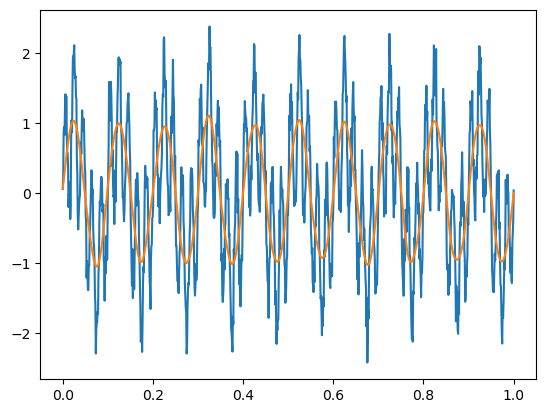

In [94]:
res = Wpd(F, 'dmey')
branch_1 = Wpd(None, 'dmey')
branch_1['aaaa'] = res['aaaa'].data
branch_1.reconstruct(update = True)
plt.plot(t, F)
plt.plot(t, branch_1.data)
plt.show()

19 задание

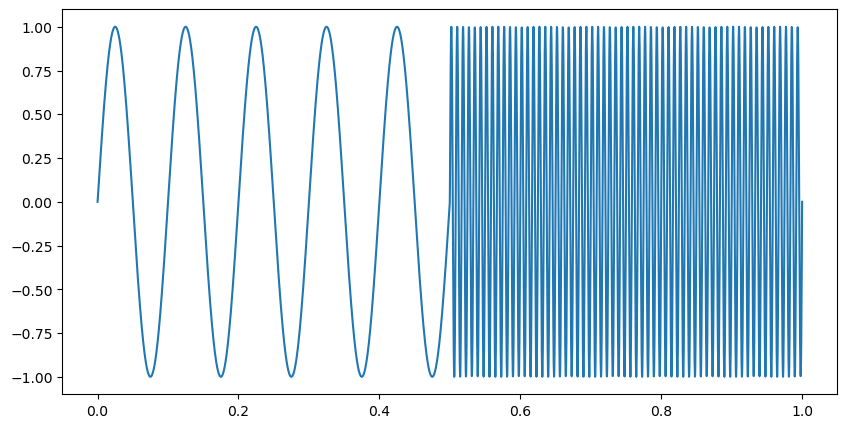

In [95]:
t = np.linspace(0, 1, 4096)
xf = np.zeros(4096)
for i in range(0, len(t)//2):
    xf[i] = np.sin(2*np.pi*10*t[i]) 
for i in range(len(t)//2, len(t)):
    xf[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, xf)
plt.show()


20 задание

 1


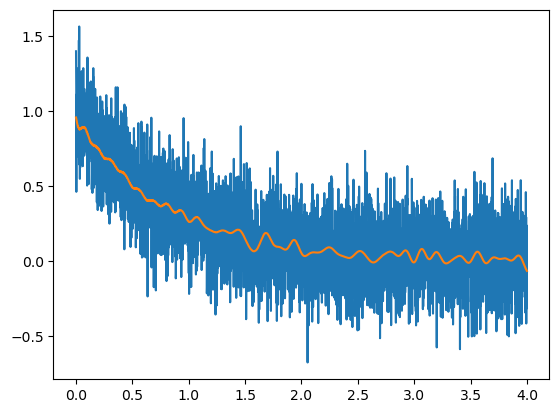

In [98]:
t = np.linspace(0, 4, 4096)
Fexp = np.exp(-0.4*np.pi*t) + 0.2*rand.randn(len(t))

numer = list(map(int, input().split(',')))
res = Dwt(Fexp, 'dmey', num = numer, Mode = 'constant')


plt.plot(t, Fexp)
plt.plot(t, res[30:-30])

21 задание

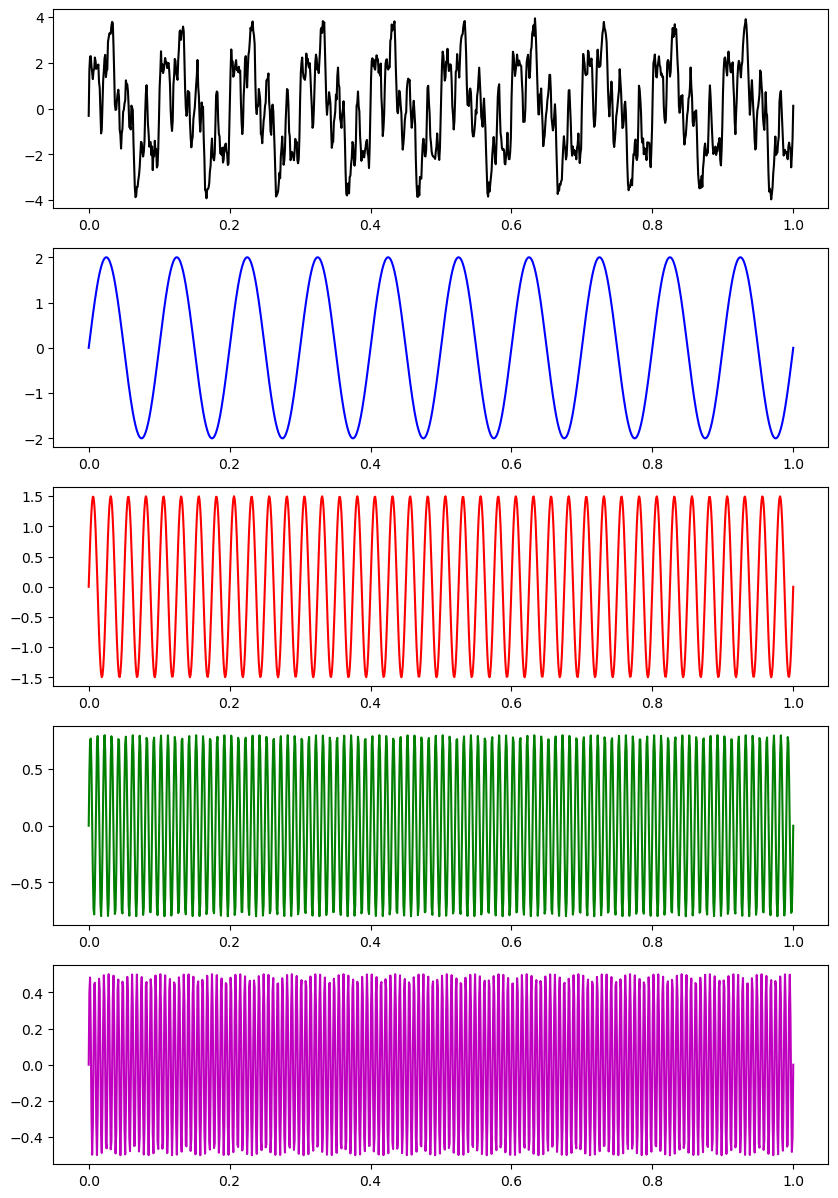

In [103]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi \
*f3*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)
plt.plot(t, F, 'k')
plt.subplot(5,1,2)
plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b')
plt.subplot(5,1,3)
plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r')
plt.subplot(5,1,4)
plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g')
plt.subplot(5,1,5)
plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm')
plt.show()


22-23 задания

In [118]:
ND = rand.randn(10000)
res = Dwt(ND, 'dmey', level = 8)